In [4]:
library(ggplot2)

Pathway scores have been calculated with the sc.tl.score_genes functionality from scanpy. Gene sets are provided in a separate folder on this github. Each dot represents the median expression/pathway score per patient (and region and cell-state)

## TGFB activation score 

In [121]:
df=read.csv("/fast/AG_Huebner/huebner3/ANALYSES/20190926_gp_BadOyenhausen/scanpy/20210302/FB/FB_nodoublets_ANNOTATED_META_SCORES_ALL.csv")

In [122]:
df_GTP <- df[which(duplicated(df$Patient)),c("Patient", "Clinical.dominant.mutation")]

In [123]:
df_GTP[,"Clinical.dominant.mutation"] <- gsub("mutation negative", "PVneg", df_GTP[,"Clinical.dominant.mutation"])

In [124]:
df_LV <- df[which(df$Region %in% c("FW", 'AP', 'S')),]
df_RV <- df[which(df$Region %in% c("RV")),]
plot_DF <- data.frame('LV'=tapply(df_LV$Pathway, df_LV$Patient, median),
           'RV'=tapply(df_RV$Pathway, df_RV$Patient, median))

In [125]:
df_GTP <- merge(df_GTP, plot_DF, by.x="Patient", by.y="row.names")

In [126]:
df_GTP <- df_GTP[-which(duplicated(df_GTP$Patient)),]

In [146]:
head(df_GTP)

,Patient,Clinical.dominant.mutation,LV,RV
,<fct>,<fct>,<dbl>,<dbl>
1,BS_H15,control,-0.0805900,-0.175466820
175,BS_H20,control,0.1098020,0.137873550
542,BS_H25,control,-0.1096010,-0.032007989
721,BS_H26,control,-0.1215397,-0.005907938
881,BS_H35,control,-0.2004352,-0.114426710
1030,BS_H37,control,-0.1052453,0.047299057


In [129]:
df_GTP[,"Clinical.dominant.mutation"] <- factor(as.character(df_GTP[,"Clinical.dominant.mutation"]), 
                                                levels=c("control", 'LMNA', 'TTN', 'RBM20', 'PKP2', 'PVneg'))

Saving 6.67 x 6.67 in image



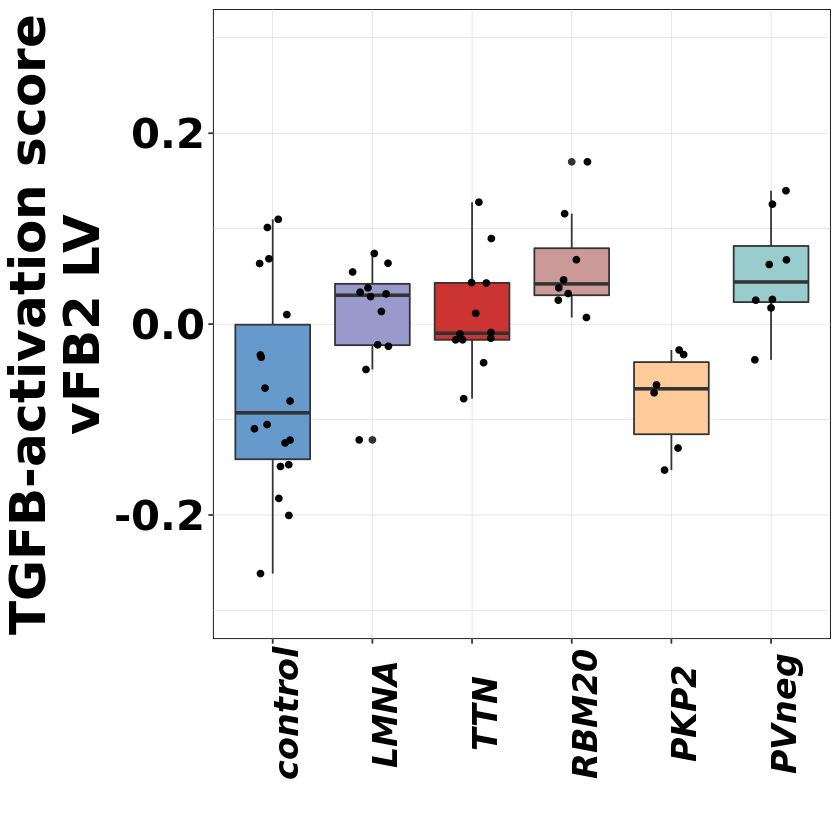

In [157]:
g <- ggplot(df_GTP, aes(y=LV, x=Clinical.dominant.mutation, fill=Clinical.dominant.mutation)) + 
    geom_boxplot() + geom_jitter(width = 0.2) +
    theme(axis.text.x = element_text(color = "black", size = 20, angle = 90, face = "bold.italic"),
          axis.text.y = element_text(color = "black", size = 25, angle = 0, face = "bold"),
          axis.title = element_text(color = "black", size = 30, angle = 0, hjust = .5, vjust = .5, face = "bold"),
          strip.text = element_text(face="bold", size=12,lineheight=5.0),
          strip.text.y = element_text(size = 20, colour = "black", angle = 0),
          strip.text.x = element_text(size = 20, colour = "black", angle = 0),
          panel.spacing=unit(1.2, "lines"),
          legend.position = "none",
          panel.background = element_rect(fill = NA, color="black"),
          panel.grid.major = element_line(colour = "grey", size=0.1),
          panel.grid.minor = element_line(colour = "grey", size=0.1)
         ) + xlab("") + ylab("TGFB-activation score\nvFB2 LV") + ylim(-0.3,0.3) + 
    scale_fill_manual(values=rev(c('#99CCCC', '#FFCC99', '#CC9999', '#CC3333', '#9999CC', '#6699CC')))
g
ggsave("/fast/AG_Huebner/huebner3/ANALYSES/20190926_gp_BadOyenhausen/scanpy/scripts/Manuscript/figures/MainFig2G_IILV.pdf", g)

In [151]:
for (GENOTYPE in c("LMNA", "TTN", "RBM20", "PKP2", 'PVneg')){
    print(wilcox.test(df_GTP[which(df_GTP[,"Clinical.dominant.mutation"]=="control"),"LV"],
       df_GTP[which(df_GTP[,"Clinical.dominant.mutation"]==GENOTYPE),"LV"])$p.value)
}

[1] 0.03095001
[1] 0.02180501
[1] 0.006272903
[1] 0.9741003
[1] 0.00923269


Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 22 rows containing missing values (geom_point).”
Saving 6.67 x 6.67 in image

Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 22 rows containing missing values (geom_point).”


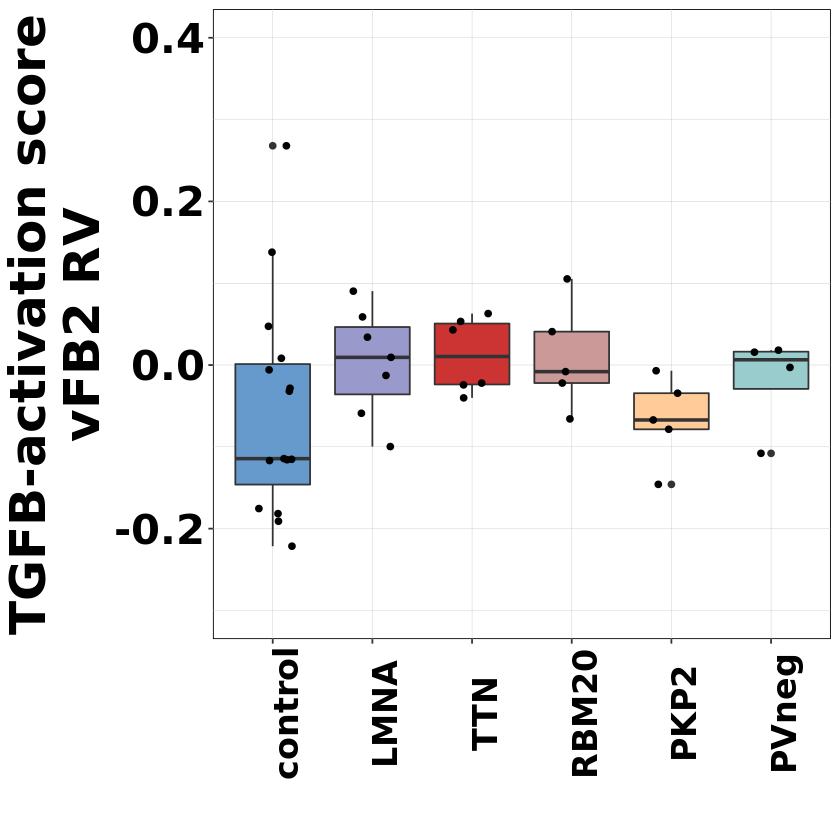

In [160]:
g <- ggplot(df_GTP, aes(y=RV, x=Clinical.dominant.mutation, fill=Clinical.dominant.mutation)) + 
    geom_boxplot() + geom_jitter(width = 0.2) +
    theme(axis.text.x = element_text(color = "black", size = 20, angle = 90, face = "bold"),
          axis.text.y = element_text(color = "black", size = 25, angle = 0, face = "bold"),
          axis.title = element_text(color = "black", size = 30, angle = 0, hjust = .5, vjust = .5, face = "bold"),
          strip.text = element_text(face="bold", size=12,lineheight=5.0),
          strip.text.y = element_text(size = 20, colour = "black", angle = 0),
          strip.text.x = element_text(size = 20, colour = "black", angle = 0),
          panel.spacing=unit(1.2, "lines"),
          legend.position = "none",
          panel.background = element_rect(fill = NA, color="black"),
          panel.grid.major = element_line(colour = "grey", size=0.1),
          panel.grid.minor = element_line(colour = "grey", size=0.1)
         ) + xlab("") + ylab("TGFB-activation score\nvFB2 RV") + ylim(-0.3,0.4) + 
    scale_fill_manual(values=rev(c('#99CCCC', '#FFCC99', '#CC9999', '#CC3333', '#9999CC', '#6699CC')))
g
ggsave("/fast/AG_Huebner/huebner3/ANALYSES/20190926_gp_BadOyenhausen/scanpy/scripts/Manuscript/figures/MainFig2G_IIRV.pdf", g)

In [152]:
for (GENOTYPE in c("LMNA", "TTN", "RBM20", "PKP2", 'PVneg')){
    print(wilcox.test(df_GTP[which(df_GTP[,"Clinical.dominant.mutation"]=="control"),"RV"],
       df_GTP[which(df_GTP[,"Clinical.dominant.mutation"]==GENOTYPE),"RV"])$p.value)
}

[1] 0.1061075
[1] 0.1122291
[1] 0.1973684
[1] 1
[1] 0.2208462


## IL 11 expression (supplementary)

In [5]:
df=read.csv("/fast/AG_Huebner/huebner3/ANALYSES/20190926_gp_BadOyenhausen/scanpy/20210302/FB/FBactivation_Fig2.csv")

In [6]:
df <- df[which(df[,"Gene"]=="IL11"),]

In [12]:
colnames(df) <- gsub("Diagnosis", "Primary.Genetic.Phenotype", colnames(df))

In [15]:
df[,'Primary.Genetic.Phenotype'] <- gsub("mut neg", "PVneg", as.character(df[,'Primary.Genetic.Phenotype']))
df[,"Primary.Genetic.Phenotype"] <- factor(df[,"Primary.Genetic.Phenotype"], levels=c("control", 'LMNA', 'TTN', 'RBM20', 'PKP2', 'PVneg'))

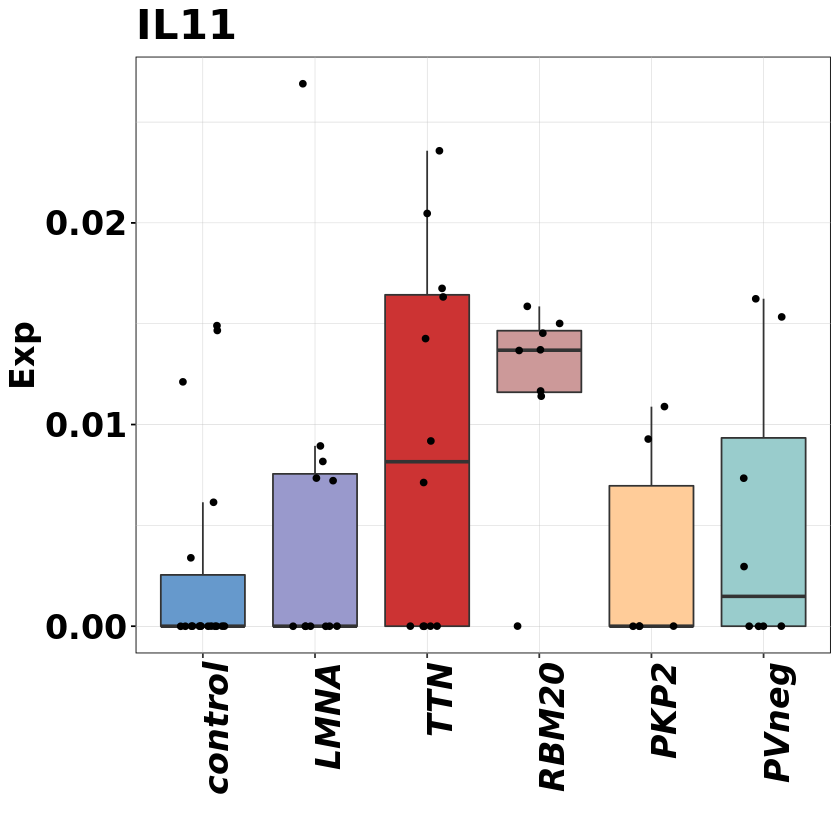

In [33]:
g <- ggplot(df, aes(x=Primary.Genetic.Phenotype, 
               y=Exp, 
               fill=Primary.Genetic.Phenotype)) + geom_boxplot(outlier.shape=NA, show.legend = FALSE) + #facet_wrap(.~Gene, scales = "free_y", nrow = 2) +
                                  geom_jitter(data=df, aes(x=Primary.Genetic.Phenotype, y=Exp), width=0.2, show.legend = FALSE) + 
                                  theme(axis.text=element_text(size=10, angle = 90),
                                        axis.title=element_text(size=17,face="bold")) + scale_fill_manual(values=rev(c('#99CCCC', '#FFCC99', '#CC9999', '#CC3333', '#9999CC', '#6699CC'))) + 
    xlab("") +
    theme(axis.text.x=element_text(size=20, color="black", angle=90, hjust=1, face = "bold.italic"),
              axis.title=element_text(size=20, color="black", face = "bold"),
              axis.text.y=element_text(size=20, color="black", face = "bold", angle=0),
              axis.ticks.y=element_line(color="black"),
              plot.title = element_text(size = 25, face = "bold"),
              #legend.title=element_blank(), 
              #legend.text=element_blank(),
              panel.background = element_rect(fill = NA, color="black"),
              panel.grid.major = element_line(colour = "grey", size=0.1),
              panel.grid.minor = element_line(colour = "grey", size=0.1)
      ) + ggtitle("IL11")
g
ggsave(plot = g, filename = "/fast/AG_Huebner/huebner3/ANALYSES/20190926_gp_BadOyenhausen/scanpy/scripts/Celltypes_20210305/figures/Boxplot_IL11_vFB2.pdf", width = 5, height = 5)


